In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../data/life_ladder_2005_2022_no3_gdp_sosupp_lifeexp_freed.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [3]:
df.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices
count,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,2014.169451,5.480902,9.380855,0.810746,63.297582,0.749359
std,4.714020,1.133171,1.156775,0.121739,6.941816,0.139344
min,2005.000000,2.179000,5.527000,0.290000,6.720000,0.258000
25%,2010.000000,4.635500,8.480500,0.744000,59.080000,0.659000
50%,2014.000000,5.433000,9.515000,0.837000,65.100000,0.771000
75%,2018.000000,6.320500,10.359000,0.907000,68.545000,0.861000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000


In [4]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2006, 2005])

In [5]:
year_lst = list(np.sort(df.year.unique()))
year_lst

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [6]:
df.query('year == 2022').sort_values(by= 'life_ladder', ascending= False ).head(10)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices
621,Finland,2022,7.729,10.814,0.974,71.225,0.959
896,Israel,2022,7.662,10.692,0.954,72.850,0.775
507,Denmark,2022,7.545,10.994,0.970,71.375,0.930
802,Iceland,2022,7.449,10.935,0.985,72.075,0.936
1790,Sweden,2022,7.431,10.913,0.949,72.275,0.939
1343,Netherlands,2022,7.390,10.981,0.929,71.625,0.868
1432,Norway,2022,7.295,11.111,0.927,71.550,0.939
1117,Luxembourg,2022,7.228,11.660,0.878,71.675,0.915
447,Costa Rica,2022,7.077,9.998,0.902,70.000,0.910
1226,Mexico,2022,7.038,9.876,0.858,65.800,0.861


In [7]:
top_10_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    top_10_over_years = pd.concat([top_10_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(5)],
                                  axis = 0)


#top_10_over_years   

In [8]:
top_10_over_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 491 to 1790
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      90 non-null     object 
 1   year                              90 non-null     object 
 2   life_ladder                       90 non-null     float64
 3   log_gdp_per_capita                90 non-null     float64
 4   social_support                    90 non-null     float64
 5   healthy_life_expectancy_at_birth  90 non-null     float64
 6   freedom_to_make_life_choices      90 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.6+ KB


In [9]:
top_10_over_years.country_name.value_counts()

country_name
Denmark          17
Finland          12
Switzerland       9
Norway            9
Iceland           9
Netherlands       8
Canada            5
Sweden            5
Israel            5
Australia         2
New Zealand       2
Costa Rica        2
Austria           2
United States     1
Ireland           1
Venezuela         1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Top 5 Happiest Countries 2005-2022')]

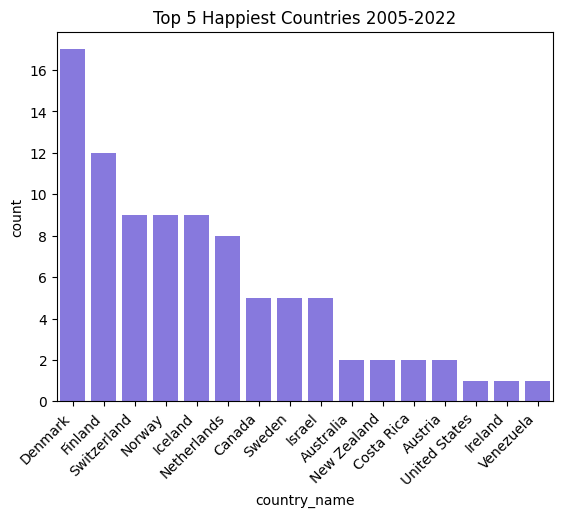

In [10]:
g=sns.countplot(data = top_10_over_years,
              x = 'country_name',
              order = top_10_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Top 5 Happiest Countries 2005-2022')

In [11]:
loosers_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    loosers_over_years = pd.concat([loosers_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).tail(5)],
                                  axis = 0)

   

[Text(0.5, 1.0, 'The 5 UnHappiest Countries 2005-2022')]

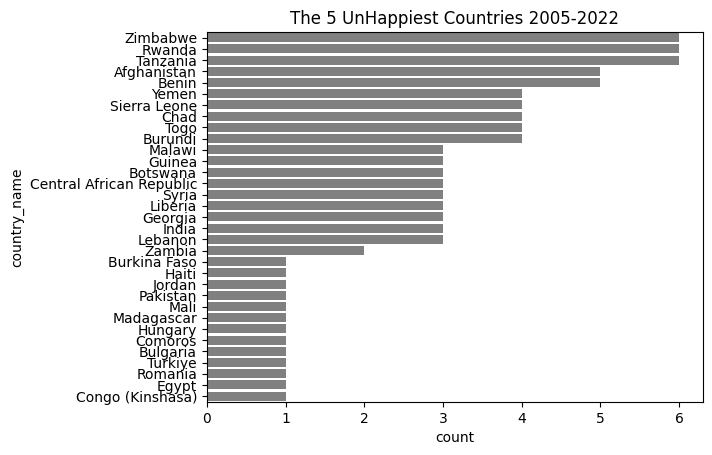

In [12]:
g=sns.countplot(data = loosers_over_years,
              y = 'country_name',
              order = loosers_over_years.country_name.value_counts().index,
              color = 'gray')
#g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set(title = 'The 5 UnHappiest Countries 2005-2022')

In [13]:
max_happy_per_year = pd.DataFrame(df.life_ladder.groupby(df.year).max())

In [14]:
max_happy_per_year.rename(columns= {0:'year', 1: 'max_life_ladder'})

,life_ladder
year,
2005,8.019
2006,7.672
2007,7.834
2008,7.971
2009,7.683
2010,7.771
2011,7.788
2012,7.776
2013,7.594


[Text(0, 0, '2005'),
 Text(1, 0, '2006'),
 Text(2, 0, '2007'),
 Text(3, 0, '2008'),
 Text(4, 0, '2009'),
 Text(5, 0, '2010'),
 Text(6, 0, '2011'),
 Text(7, 0, '2012'),
 Text(8, 0, '2013'),
 Text(9, 0, '2014'),
 Text(10, 0, '2015'),
 Text(11, 0, '2016'),
 Text(12, 0, '2017'),
 Text(13, 0, '2018'),
 Text(14, 0, '2019'),
 Text(15, 0, '2020'),
 Text(16, 0, '2021'),
 Text(17, 0, '2022')]

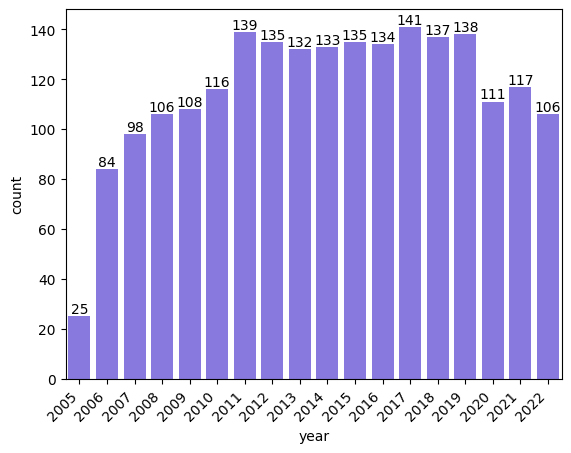

In [15]:
g = sns.countplot(x = df.year, color = 'mediumslateblue')
for c in g.containers:
        g.bar_label(c, label_type='edge')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

add a column with the class of life_ladder, bin from 1 to 8

In [16]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices'],
      dtype='object')

In [25]:
df['ladder_bin'] = df.life_ladder.astype(int)

In [26]:
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,ladder_bin
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,3
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,4
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,4
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,3
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,3


In [27]:
df.ladder_bin.value_counts()

life_ladder
5    631
4    561
6    457
7    247
3    179
2     19
8      1
Name: count, dtype: int64

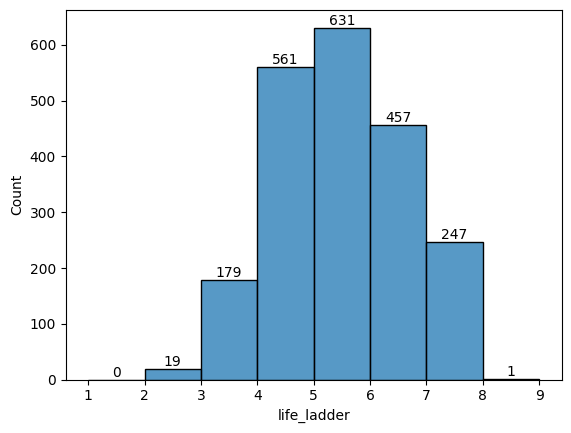

In [28]:
custom_bins = np.arange(1,10,1)
h = sns.histplot(df.life_ladder, bins = custom_bins)
for c in h.containers:
        h.bar_label(c, label_type='edge')

In [31]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'ladder_bin'],
      dtype='object')

In [40]:
dict_ladder_bin = []
for m in range(2,9):
    dict_ladder_bin.append({'ladder_bin': m,
                            'life_ladder': df.query(f'ladder_bin == {m}').life_ladder.mean(),
                            'log_gdp_per_capita': df.query(f'ladder_bin == {m}').log_gdp_per_capita.mean(),
                            'social_support': df.query(f'ladder_bin == {m}').social_support.mean(),
                            'healthy_life_expectancy_at_birth': df.query(f'ladder_bin == {m}').healthy_life_expectancy_at_birth.mean(),
                            'freedom_to_make_life_choices': df.query(f'ladder_bin == {m}').freedom_to_make_life_choices.mean(),})
    
df_ladder_bin = pd.DataFrame(dict_ladder_bin)
df_ladder_bin

,ladder_bin,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices
0,2,2.686316,7.788316,0.512474,55.393947,0.532737
1,3,3.648497,7.935855,0.662196,53.890866,0.667514
2,4,4.542009,8.497991,0.735168,58.521121,0.684590
3,5,5.491239,9.451578,0.823564,64.335689,0.732922
4,6,6.442101,10.257079,0.889740,68.006718,0.813930
5,7,7.341174,10.747947,0.933449,70.186012,0.894065
6,8,8.019000,10.849000,0.972000,68.300000,0.971000


<Axes: xlabel='log_gdp_per_capita', ylabel='ladder_bin'>

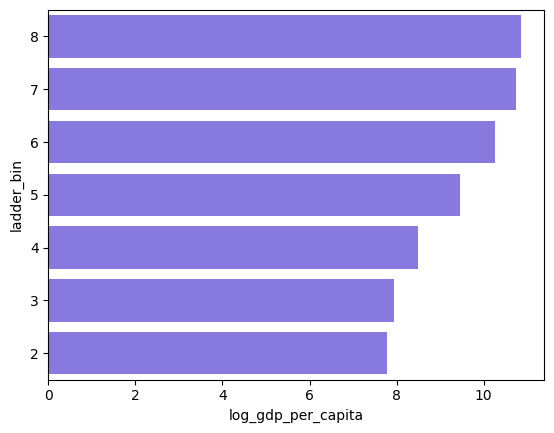

In [36]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.log_gdp_per_capita,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

<Axes: xlabel='social_support', ylabel='ladder_bin'>

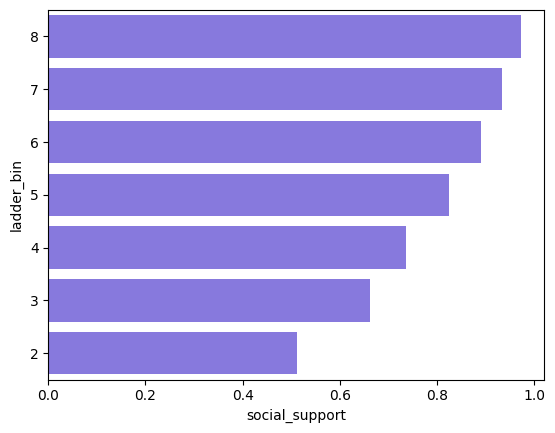

In [37]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.social_support,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

<Axes: xlabel='healthy_life_expectancy_at_birth', ylabel='ladder_bin'>

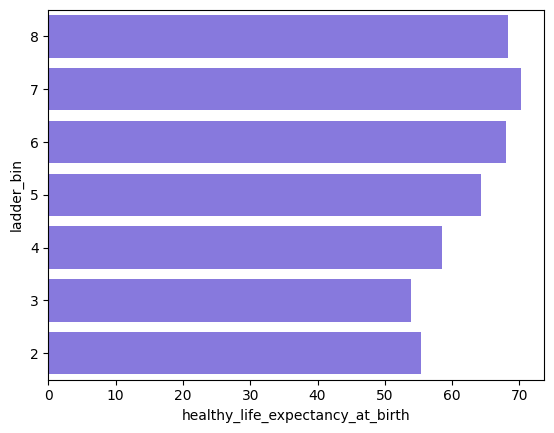

In [38]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.healthy_life_expectancy_at_birth,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

<Axes: xlabel='freedom_to_make_life_choices', ylabel='ladder_bin'>

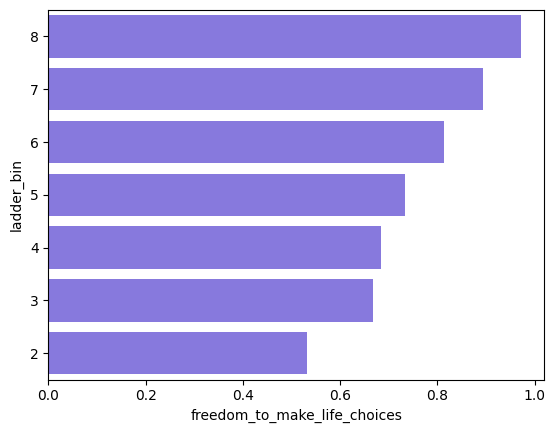

In [39]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.freedom_to_make_life_choices,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

<Axes: xlabel='ladder_bin', ylabel='log_gdp_per_capita'>

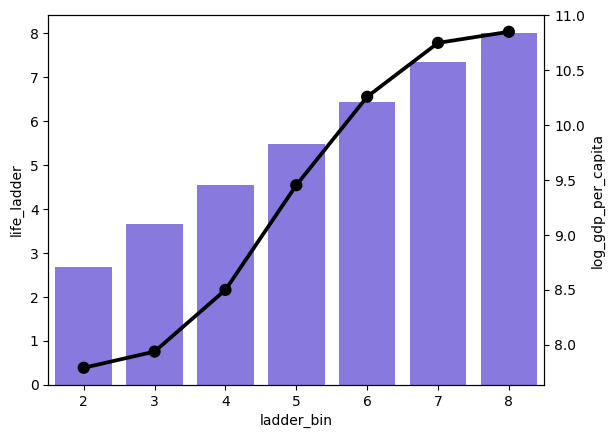

In [46]:
ax1 = sns.barplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.life_ladder,
            color = 'mediumslateblue',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= True))
ax2 = ax1.twinx()
sns.pointplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.log_gdp_per_capita,
            color = 'black')

<Axes: xlabel='ladder_bin', ylabel='social_support'>

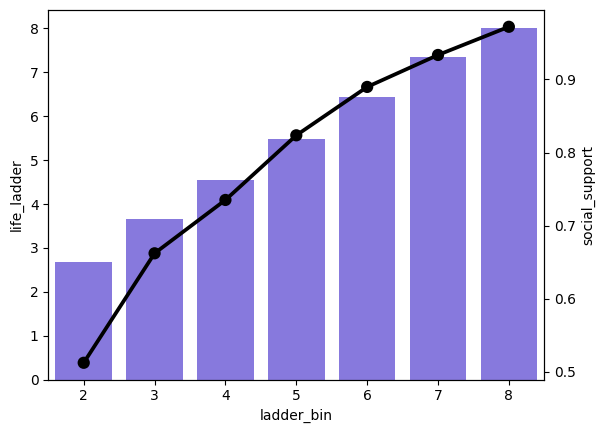

In [47]:
ax1 = sns.barplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.life_ladder,
            color = 'mediumslateblue',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= True))
ax2 = ax1.twinx()
sns.pointplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.social_support,
            color = 'black')

<Axes: xlabel='ladder_bin', ylabel='healthy_life_expectancy_at_birth'>

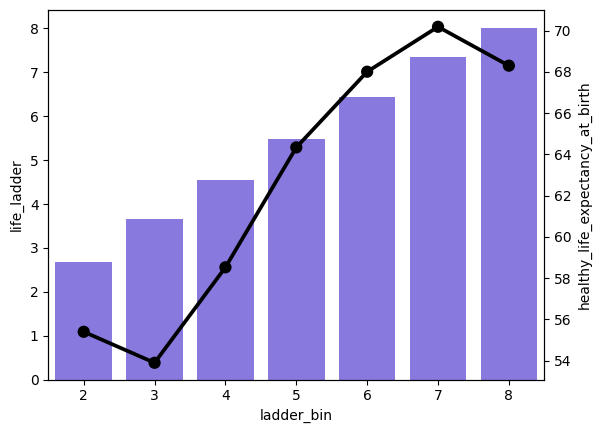

In [48]:
ax1 = sns.barplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.life_ladder,
            color = 'mediumslateblue',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= True))
ax2 = ax1.twinx()
sns.pointplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.healthy_life_expectancy_at_birth,
            color = 'black')

<Axes: xlabel='ladder_bin', ylabel='freedom_to_make_life_choices'>

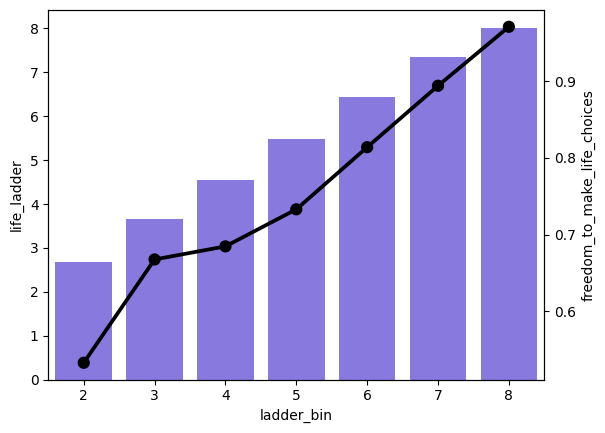

In [49]:
ax1 = sns.barplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.life_ladder,
            color = 'mediumslateblue',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= True))
ax2 = ax1.twinx()
sns.pointplot(x = df_ladder_bin.ladder_bin,
            y = df_ladder_bin.freedom_to_make_life_choices,
            color = 'black')